In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../data/howpop_train.csv')

In [3]:
data.shape

(134137, 17)

In [4]:
data.drop(filter(lambda c: c.endswith('_lognorm'), data.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True)

In [5]:
data.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0


In [6]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [7]:
print(data.published.dtype)
data['published'] = pd.to_datetime(data.published, yearfirst = True)
print(data.published.dtype)

object
datetime64[ns]


In [8]:
data['year'] = [d.year for d in data.published]
data['month'] = [d.month for d in data.published]

data['dayofweek'] = [d.isoweekday() for d in data.published]
data['hour'] = [d.hour for d in data.published]

In [24]:
data['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

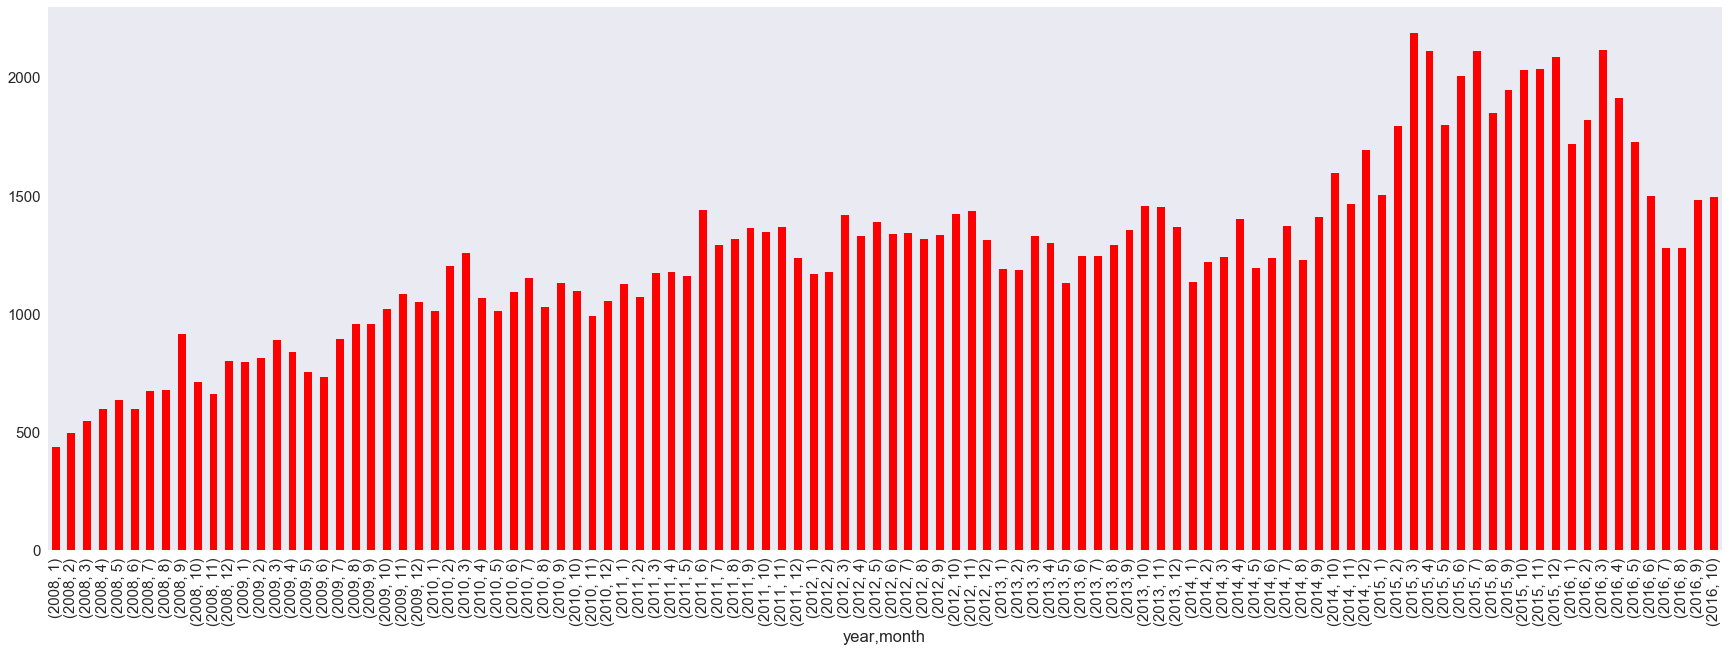

In [57]:
#1. В каком месяце (и какого года) было больше всего публикаций?
month_df = data[['month']+['year']+['url']]
month_df.groupby(['year','month'])['url'].count().plot(kind="bar",figsize=(30,10),color='r')
#as plot shows, answer is march 2015


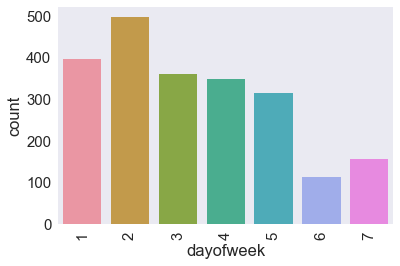

In [69]:
#2. Проанализируйте публикации в месяце из предыдущего вопроса
#Выберите один или несколько вариантов:

#Один или несколько дней сильно выделяются из общей картины(true)

mar15_df = data[(data['month'] == 3) & (data['year'] == 2015)]
mar15_df.groupby('dayofweek')['url'].count().plot(kind="bar",color='r')
sns.countplot(x='dayofweek',data=mar15_df)

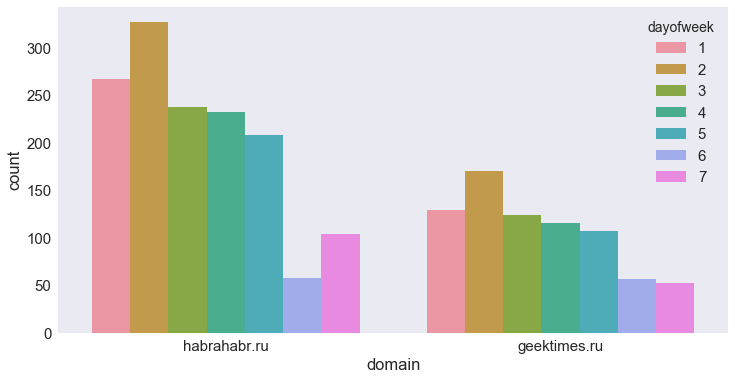

In [76]:
#На хабре всегда больше статей, чем на гиктаймс(true)(58 и 57)
#По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей(false)
plt.figure(figsize=(12,6))
sns.countplot(x='domain', data=mar15_df, hue='dayofweek')


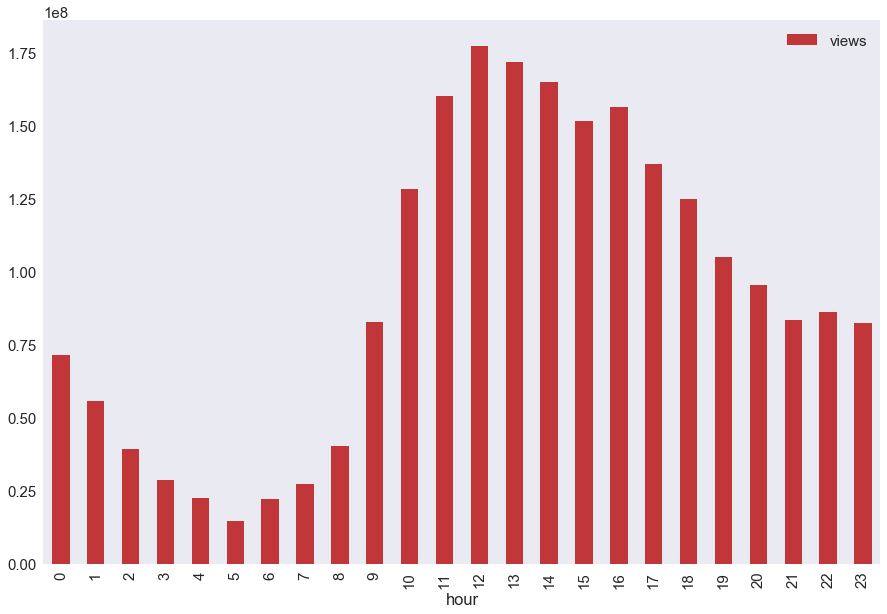

In [26]:
#3.Больше всего просмотров набирают статьи, опубликованные в 12 часов дня(TRUE)
#У опубликованных в 10 утра постов больше всего комментариев(FALSE)
#Больше всего просмотров набирают статьи, опубликованные в 6 часов утра(False)
#Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера(False)
#На хабре дневные статьи комментируют чаще, чем вечерние(TRUE)
view_hr = data[['hour'] + ['views']]
view_hr.groupby('hour').sum().plot(kind = 'bar',figsize=(15,10))

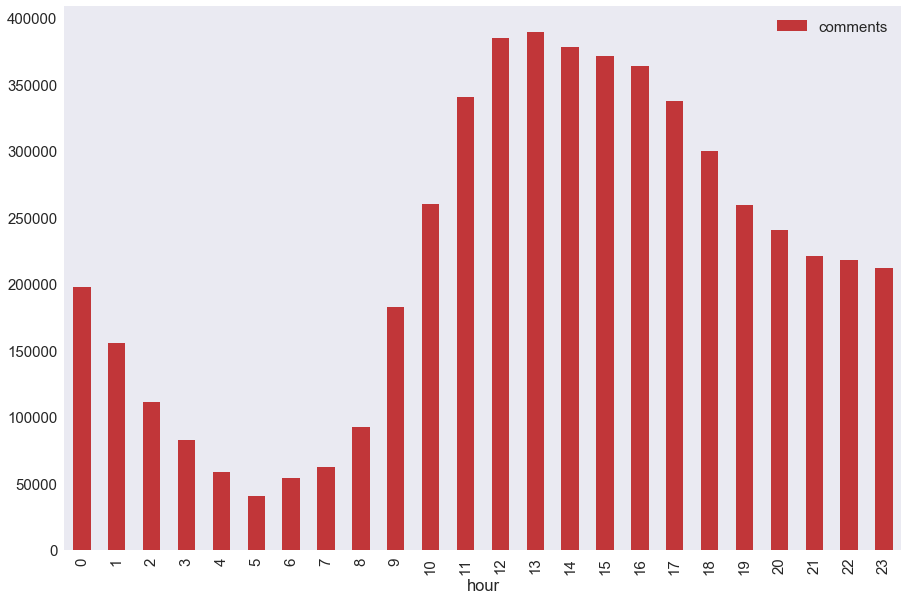

In [27]:
#У опубликованных в 10 утра постов больше всего комментариев(FALSE)
comm_hr = data[['hour'] + ['comments']]
comm_hr.groupby('hour').sum().plot(kind = 'bar',figsize=(15,10))

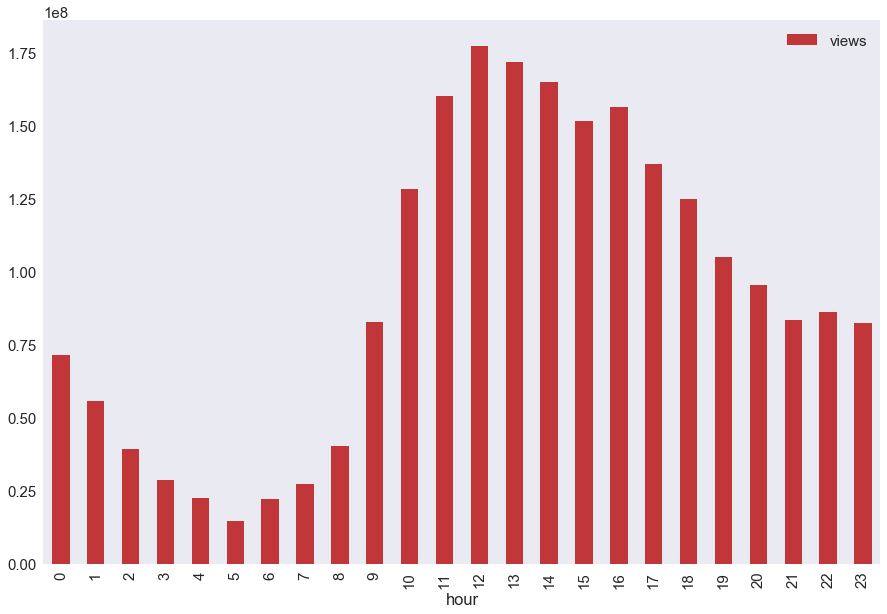

In [28]:
#Больше всего просмотров набирают статьи, опубликованные в 6 часов утра(False)
view_hr = data[['hour'] + ['views']]
view_hr.groupby('hour').sum().plot(kind = 'bar',figsize=(15,10))

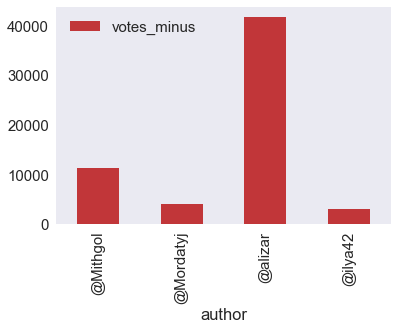

In [15]:
#4. Кого из топ-20 авторов чаще всего минусуют? '@alizar'

tmp = data[(data['author'] == '@Mordatyj')  |
               (data['author'] == '@Mithgol')|
               (data['author'] == '@alizar') |
               (data['author'] == '@ilya42')]
auth_min_df = tmp[['author'] + ['votes_minus']]
auth_min_df.groupby('author').sum().plot(kind='bar')

Text(0.5,1,'Monday')

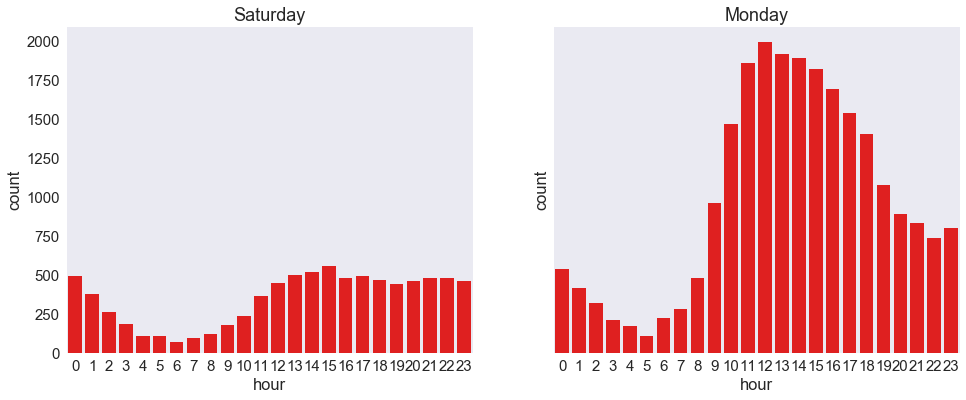

In [45]:
#Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?(False)
sat_tmp = data[data['dayofweek'] == 6]
mon_tmp = data[data['dayofweek'] == 1]

_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x = 'hour', data = sat_tmp , color = 'r', ax = axes[0] )
axes[0].set_title('Saturday')
sns.countplot(x = 'hour', data = mon_tmp , color = 'r' , ax = axes[1])
axes[1].set_title('Monday')


